In [1]:
# Import pandas and any other libraries you need here. 
# Create a new dataframe from your CSV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels import api as sm
import numpy as np
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("numeric columns: ", numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("non-numeric columns: ",non_numeric_cols)

(23486, 11)
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object
numeric columns:  ['Unnamed: 0' 'Clothing ID' 'Age' 'Rating' 'Recommended IND'
 'Positive Feedback Count']
non-numeric columns:  ['Title' 'Review Text' 'Division Name' 'Department Name' 'Class Name']


## Missing Data

### Heatmap

<AxesSubplot: >

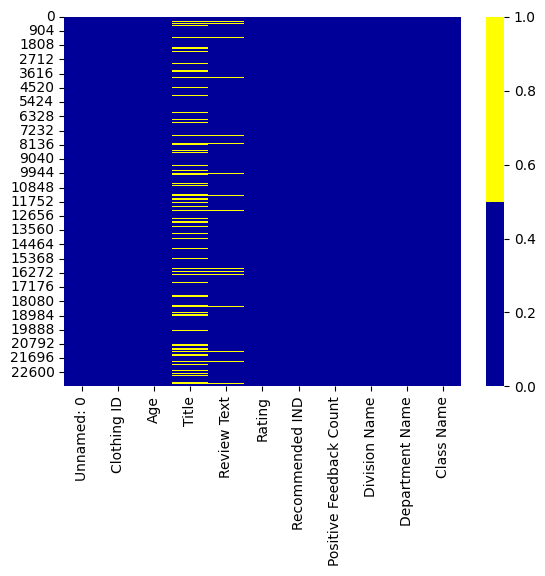

In [9]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

### percentage list

In [10]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


### Histogram

created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot: xlabel='index'>

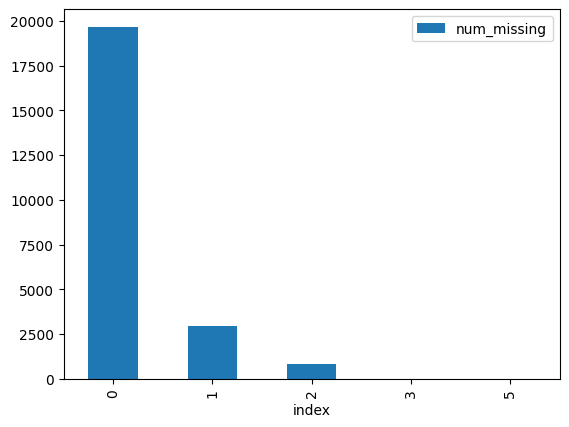

In [11]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Missing data are categorical data, we can drop them or fill them with "Missing". I would prefer using the "Missing".

In [12]:
df['Title'] = df['Title'].fillna('_MISSING_')

In [13]:
df['Review Text'] = df['Review Text'].fillna('_MISSING_')

## Irregular Data

<AxesSubplot: >

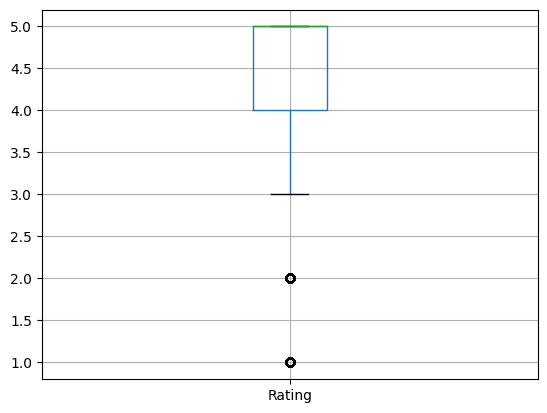

In [14]:
df.boxplot(column=['Rating'])

<AxesSubplot: >

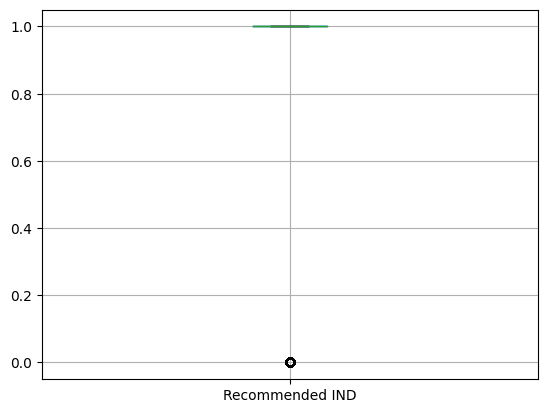

In [15]:
df.boxplot(column=['Recommended IND'])

<AxesSubplot: >

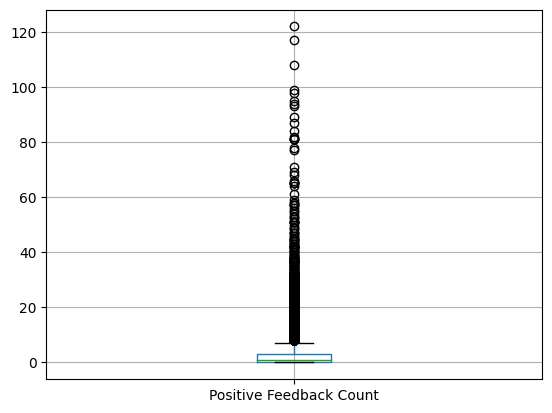

In [16]:
df.boxplot(column=['Positive Feedback Count'])

<AxesSubplot: >

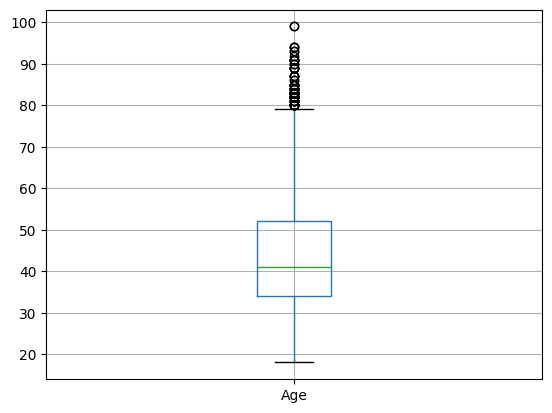

In [17]:
df.boxplot(column=['Age'])

In [18]:
df['Rating'].describe()

count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [19]:
df['Positive Feedback Count'].describe()

count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

<AxesSubplot: >

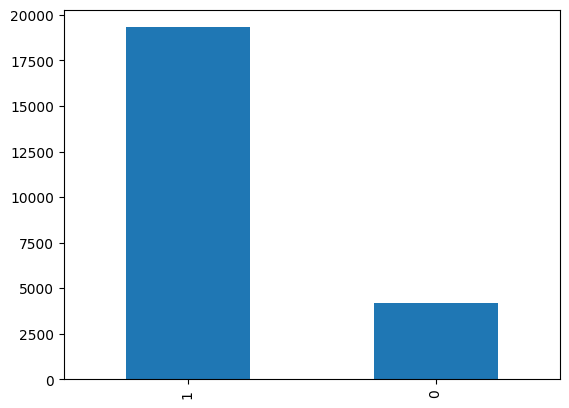

In [21]:
df['Recommended IND'].value_counts().plot.bar()

<AxesSubplot: >

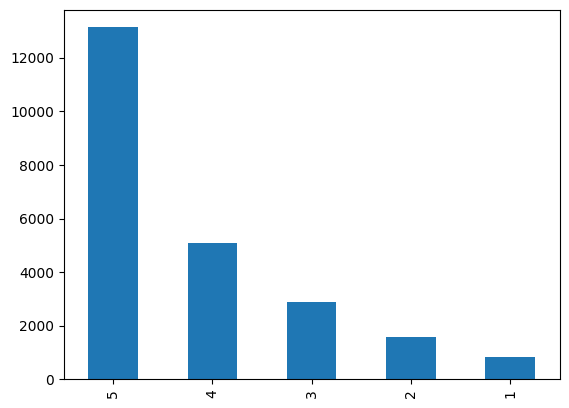

In [22]:
df['Rating'].value_counts().plot.bar()

## Unnecessary Data

In [25]:
num_rows = len(df.index)
low_information_cols = [] 

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Review Text_ismissing: 96.40211%
False    22641
True       845
Name: Review Text_ismissing, dtype: int64

Division Name_ismissing: 99.94039%
False    23472
True        14
Name: Division Name_ismissing, dtype: int64

Department Name_ismissing: 99.94039%
False    23472
True        14
Name: Department Name_ismissing, dtype: int64

Class Name_ismissing: 99.94039%
False    23472
True        14
Name: Class Name_ismissing, dtype: int64



In [26]:
# Drop the low-information columns
df = df.drop(low_information_cols, axis=1)

In [27]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("numeric columns: ", numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("non-numeric columns: ",non_numeric_cols)

(23486, 13)
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
Title_ismissing              bool
num_missing                 int64
dtype: object
numeric columns:  ['Unnamed: 0' 'Clothing ID' 'Age' 'Rating' 'Recommended IND'
 'Positive Feedback Count' 'num_missing']
non-numeric columns:  ['Title' 'Review Text' 'Division Name' 'Department Name' 'Class Name'
 'Title_ismissing']


### Duplicates

In [28]:
duplicate_rows = df.duplicated()

In [29]:
num_duplicates = duplicate_rows.sum()

In [30]:
df_unique = df.drop_duplicates()

In [31]:
print(df.shape)

(23486, 13)


## Inconsistent data

### Capitalization

In [32]:
df['Division Name'].value_counts(dropna=False)

General           13850
General Petite     8120
Initmates          1502
NaN                  14
Name: Division Name, dtype: int64

In [34]:
#make everything lower case.
df['Division Name'] = df['Division Name'].str.lower()
df['Division Name'].value_counts(dropna=False)

general           13850
general petite     8120
initmates          1502
NaN                  14
Name: Division Name, dtype: int64

In [35]:
df['Department Name'].value_counts(dropna=False)

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
NaN            14
Name: Department Name, dtype: int64

In [36]:
#make everything lower case.
df['Department Name'] = df['Department Name'].str.lower()
df['Department Name'].value_counts(dropna=False)

tops        10468
dresses      6319
bottoms      3799
intimate     1735
jackets      1032
trend         119
NaN            14
Name: Department Name, dtype: int64

In [37]:
df['Class Name'].value_counts(dropna=False)

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
NaN                 14
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [38]:
#make everything lower case.
df['Class Name'] = df['Class Name'].str.lower()
df['Class Name'].value_counts(dropna=False)

dresses           6319
knits             4843
blouses           3097
sweaters          1428
pants             1388
jeans             1147
fine gauge        1100
skirts             945
jackets            704
lounge             691
swim               350
outerwear          328
shorts             317
sleep              228
legwear            165
intimates          154
layering           146
trend              119
NaN                 14
casual bottoms       2
chemises             1
Name: Class Name, dtype: int64

In [41]:
df.tail(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,num_missing
23476,23476,522,27,Cheeky!,These bottoms are very cute but defiantly chee...,4,1,0,initmates,intimate,swim,False,0
23477,23477,1094,39,Entrancing,I'm so impressed with the beautiful color comb...,4,1,5,general petite,dresses,dresses,False,0
23478,23478,1104,32,Unflattering,I was surprised at the positive reviews for th...,1,0,0,general petite,dresses,dresses,False,0
23479,23479,1005,42,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5,1,0,general petite,bottoms,skirts,False,0
23480,23480,862,35,_MISSING_,_MISSING_,5,1,0,general petite,tops,knits,True,2
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,general petite,dresses,dresses,False,0
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,general petite,tops,knits,False,0
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,general petite,dresses,dresses,False,0
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,general,dresses,dresses,False,0
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,general petite,dresses,dresses,False,0
